In [12]:
import numpy as np
import pandas as pd
import sgdLR
import seaborn as sns
import matplotlib.pyplot as plt
from lr import LinearRegression, file_to_numpy

In [13]:
# load the train and test data
xTrain = file_to_numpy("new_xTrain.csv")
yTrain = file_to_numpy("eng_yTrain.csv")
xTest = file_to_numpy("new_xTest.csv")
yTest = file_to_numpy("eng_yTest.csv")

# setting the seed for deterministic behavior
np.random.seed(334)

In [14]:
bs = 1  # set batch size to 1 again
lr = 0.0001 # optimal learning rate from sgdPlotB
epoch = 51  # larger epoch to see that it stays stable over time

In [15]:
model = sgdLR.SgdLR(lr, bs, epoch)  # get the model
trainStats = model.train_predict(xTrain, yTrain, xTest, yTest)  # get the stats

In [16]:
df = pd.DataFrame(columns=['Training MSE', 'Testing MSE'])
B = int(len(xTrain)/bs)

# makes data messy so I got rid of this
# series = pd.Series({'Training MSE': trainStats[0]['train-mse'], 'Testing MSE': trainStats[0]['test-mse']})
# df = df.append(series, ignore_index=True)

for currEpoch in range(1, epoch):
    series = pd.Series({'Training MSE': trainStats[B * currEpoch - 1]['train-mse'], 'Testing MSE': trainStats[B * currEpoch - 1]['test-mse']})
    df = df.append(series, ignore_index=True)

df.index += 1  # start the index at one since that it what the epoch starts at
# print(df)

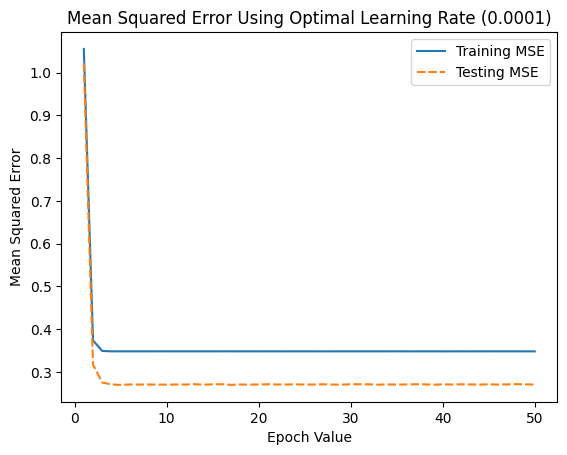

In [17]:
# use some seaborn and plot the output
graph = sns.lineplot(data=df)
graph.set(xlabel="Epoch Value", ylabel="Mean Squared Error", title="Mean Squared Error Using Optimal Learning Rate ("+str(lr)+")")
plt.show()